<a href="https://colab.research.google.com/github/julialromero/regional-representations-graph-model/blob/master/dataset/earth_engine/landsat_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 1.4 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [2]:
! pip install torchgeo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.2/290.2 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 569.1/569.1 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.2/517.2 KB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.8/825.8 KB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [3]:
! pip install geemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.6/99.6 KB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 KB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 KB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [4]:
! pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 44.7 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.3
    Uninstalling matplotlib-3.6.3:
      Successfully uninstalled matplotlib-3.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchgeo 0.4.0 requires matplotlib<4,>=3.3, but you have matplotlib 3.1.3 which is incompatible.


In [5]:
#
# ! pip install pyrsgis

In [6]:
# ! pip install git+https://github.com/jgrss/geowombat

In [7]:
from google.colab import drive
drive.mount('/content/drive')

image_dir = r'/content/drive/MyDrive/landsat/download_landsat_images/'

Mounted at /content/drive


In [8]:
import os
import ee
import geemap
import matplotlib.pyplot as plt
import geopandas

import torch
import torchgeo
from torch.utils.data import DataLoader
from torchgeo.datasets import RasterDataset, stack_samples, unbind_samples
from torchgeo.datasets.utils import download_url
from torchgeo.samplers import RandomGeoSampler

In [ ]:
dir_path = 'content/drive/MyDrive/landsat/download_landsat_images/test1/09003514500_0.tif'
class Landsat8(RasterDataset):
    filename_glob = "T*_B02_10m.tif"
    filename_regex = r"^.{6}_(?P<date>\d{8}T\d{6})_(?P<band>B0[\d])"
    date_format = "%Y%m%dT%H%M%S"
    is_image = True
    separate_files = True
    all_bands = ["B02", "B03", "B04", "B08"]
    rgb_bands = ["B04", "B03", "B02"]

    #     all_bands = [
        "SR_B1",
        "SR_B2",
        "SR_B3",
        "SR_B4",
        "SR_B5",
        "SR_B6",
        "SR_B7",
        "SR_B8",
        "SR_B9",
        "SR_B10",
        "SR_B11",
    ]
    rgb_bands = ["SR_B4", "SR_B3", "SR_B2"]

    def plot(self, sample):
        # Find the correct band index order
        rgb_indices = []
        for band in self.rgb_bands:
            rgb_indices.append(self.all_bands.index(band))

        # Reorder and rescale the image
        image = sample["image"][rgb_indices].permute(1, 2, 0)
        image = torch.clamp(image / 10000, min=0, max=1).numpy()

        # Plot the image
        fig, ax = plt.subplots()
        ax.imshow(image)

        return fig

In [24]:
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import Dataset, DataLoader
from torch import nn
import torch.optim as optim
import PIL
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [10]:
path_to_img_dir = '/content/drive/MyDrive/landsat/download_landsat_images/'
image_folders = os.listdir(image_dir)

In [14]:
import geowombat as gw

In [ ]:
fig, ax = plt.subplots(dpi=200)
with gw.open('/content/drive/MyDrive/landsat/download_landsat_images/09013535101/LC08_013031_20200222.tif') as src:
    src.where(src != 0).sel(band=[1]).gw.imshow(robust=True, ax=ax)
plt.tight_layout(pad=1)

In [11]:
import imageio
import numpy.ma as ma

In [107]:
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),   #must same as here
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(), # data augmentation
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # normalization
])

In [117]:
dir = '/content/drive/MyDrive/landsat/download_landsat_images/'
batch = torch.empty(1, 3, 224, 224)
for img_dir in os.listdir(dir):
  try:
    path = os.listdir(dir + img_dir)[0]
    img = np.array(imageio.imread(dir + img_dir + '/' + path))

    B2_blue = img[:,:,1]
    B3_green = img[:,:,2]
    B4_red = img[:,:,3]

    rgb = np.stack([B4_red, B3_green, B2_blue], axis=0)

    rgb[rgb == -np.inf] = 0
    out = transform(torch.tensor(rgb))
    out = torch.unsqueeze(out, 0)



    batch = torch.cat((batch, out), 0)
  except:
    if len(os.listdir(dir + img_dir)) == 0:
      pass
    if path == '.ipynb_checkpoints':
      pass
    print(path)

.ipynb_checkpoints
.ipynb_checkpoints


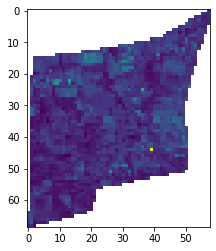

In [16]:
plt.imshow(B2_blue)

In [17]:
# z = ma.masked_values(rgb, -np.inf)

In [ ]:
# class LandsatDataset(Dataset):

#     def __init__(self, root, image_dir, csv_file, transform=None):
#         self.root = root
#         self.image_dir = image_dir
#         self.image_folders= os.listdir(image_dir)
#         self.geoid_idx_df = pd.read_csv(csv_file)
#         self.transform = transform

#     def __len__(self):
#         return len(self.geoid_idx_df)

#     def __getitem__(self, index):
#         image_folder = os.path.join(self.image_dir, self.image_files[index]) 
#         image_name = os.path.join(image_folder, 'median.tif')




#         image = PIL.Image.open(image_name)
#         label = self.data[index]
#         if self.transform:
#             image = self.transform(image)
#         return (image, label)

In [118]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [119]:
model = models.resnet18(pretrained=True)   #load resnet18 model
num_features = model.fc.in_features     #extract fc layers features
model.fc = nn.Linear(num_features, 200) #(num_of_class == 2)
model = model.to(device) 
# criterion = nn.CrossEntropyLoss()  #(set loss function)
# optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [120]:
resnet_out = model(batch)